<a href="https://colab.research.google.com/github/lalith0203/Sales-Forecasting-using-LSTM/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RSCCASN.csv to RSCCASN.csv


In [ ]:
dataset_path = 'RSCCASN.csv'

In [ ]:
sales_data = pd.read_csv(dataset_path,  parse_dates=True, index_col='DATE')

In [ ]:
type(sales_data)

pandas.core.frame.DataFrame

In [ ]:
sales_data.columns

Index(['RSCCASN'], dtype='object')

In [ ]:
sales_data.columns

Index(['RSCCASN'], dtype='object')

In [ ]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 349 entries, 1992-01-01 to 2021-01-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  349 non-null    int64
dtypes: int64(1)
memory usage: 5.5 KB
None


In [ ]:
print(sales_data.describe())

            RSCCASN
count    349.000000
mean   16395.332378
std     5490.564719
min     2904.000000
25%    12354.000000
50%    15911.000000
75%    19828.000000
max    34611.000000


In [ ]:
sales_data.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [ ]:
sales_data.tail()

,RSCCASN
DATE,
2020-09-01,18031
2020-10-01,19187
2020-11-01,20228
2020-12-01,30448
2021-01-01,14738


<Axes: xlabel='DATE'>

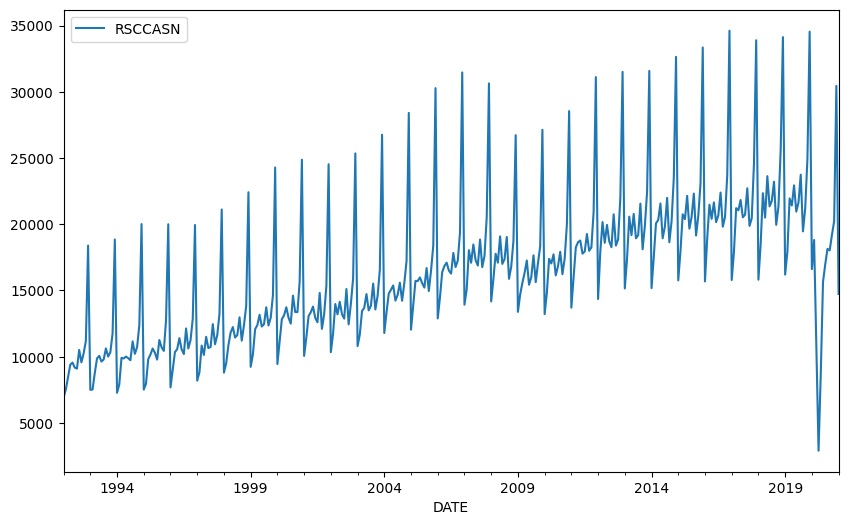

In [ ]:
sales_data.plot(figsize=(10, 6))

In [ ]:
len(sales_data)

349

In [ ]:
len(sales_data) - 18

331

In [ ]:
test_size = 18
test_index = len(sales_data) - test_size

In [ ]:
test_index

331

In [ ]:
train = sales_data.iloc[:test_index]
test = sales_data.iloc[test_index:]

In [ ]:
train.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [ ]:
train.tail()

,RSCCASN
DATE,
2019-03-01,21953
2019-04-01,21416
2019-05-01,22938
2019-06-01,20960
2019-07-01,21650


In [ ]:
test.head()

,RSCCASN
DATE,
2019-08-01,23743
2019-09-01,19464
2019-10-01,21177
2019-11-01,24928
2019-12-01,34541


In [ ]:
test.tail()

,RSCCASN
DATE,
2020-09-01,18031
2020-10-01,19187
2020-11-01,20228
2020-12-01,30448
2021-01-01,14738


In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:5]

array([[0.        ],
       [0.02117588],
       [0.0555415 ],
       [0.08900372],
       [0.09467712]])

In [ ]:
scaled_test[:5]

array([[0.60727062],
       [0.45264337],
       [0.51454486],
       [0.65009215],
       [0.99747046]])

In [ ]:
length = 12

In [ ]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [ ]:
X, y = generator[0]

In [ ]:
X

array([[[0.        ],
        [0.02117588],
        [0.0555415 ],
        [0.08900372],
        [0.09467712],
        [0.08108987],
        [0.0782351 ],
        [0.12918729],
        [0.09521917],
        [0.11982799],
        [0.15354316],
        [0.41401366]]])

In [ ]:
y

array([[0.02038088]])

In [ ]:
len(X[0])

12

In [ ]:
n_features = 1

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [ ]:
model.fit(generator, epochs=70,
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/70
319/319 [==============================] - 5s 11ms/step - loss: 0.0235 - val_loss: 0.0293
Epoch 2/70
319/319 [==============================] - 3s 10ms/step - loss: 0.0171 - val_loss: 0.0203
Epoch 3/70
319/319 [==============================] - 3s 10ms/step - loss: 0.0079 - val_loss: 0.0058
Epoch 4/70
319/319 [==============================] - 3s 10ms/step - loss: 0.0052 - val_loss: 0.0055
Epoch 5/70
319/319 [==============================] - 5s 15ms/step - loss: 0.0031 - val_loss: 0.0127
Epoch 6/70
319/319 [==============================] - 3s 10ms/step - loss: 0.0022 - val_loss: 0.0281


In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

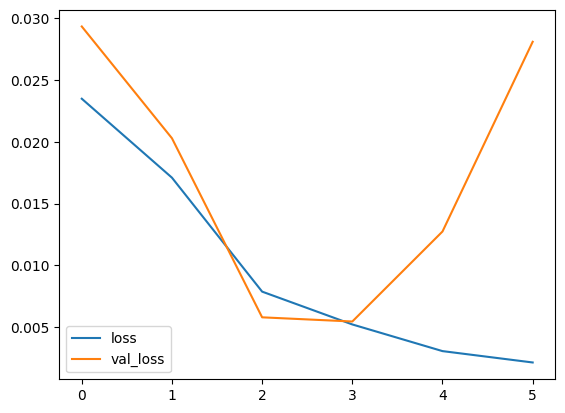

In [ ]:
losses.plot()

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
true_prediction = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_prediction

<ipython-input-46-661b3dfb2b25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_prediction


In [ ]:
test

,RSCCASN,Predictions
DATE,,
2019-08-01,23743,24259.644906
2019-09-01,19464,21661.192402
2019-10-01,21177,22923.811822
2019-11-01,24928,26870.875615
2019-12-01,34541,36022.484619
2020-01-01,16612,18199.943749
2020-02-01,18813,19658.564396
2020-03-01,10833,23054.516694
2020-04-01,2904,22664.707995


<Axes: xlabel='DATE'>

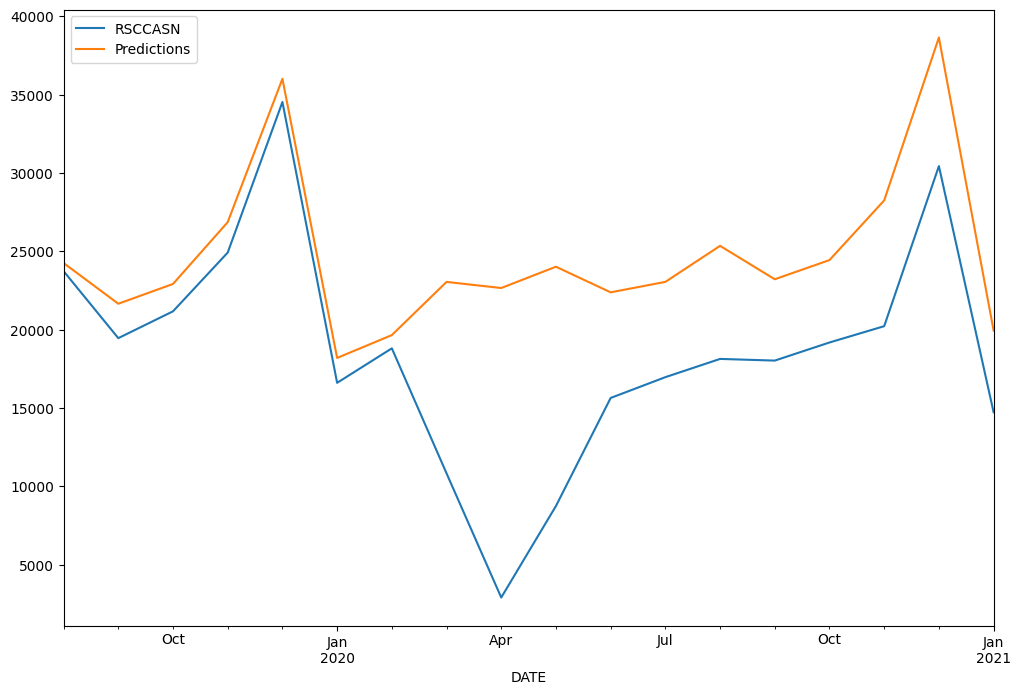

In [ ]:
test.plot(figsize=(12, 8))

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(sales_data)

In [ ]:
length = 12
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(generator, epochs=20)

Epoch 1/20
337/337 [==============================] - 5s 9ms/step - loss: 0.0247
Epoch 2/20
337/337 [==============================] - 4s 13ms/step - loss: 0.0184
Epoch 3/20
337/337 [==============================] - 4s 12ms/step - loss: 0.0122
Epoch 4/20
337/337 [==============================] - 5s 14ms/step - loss: 0.0088
Epoch 5/20
337/337 [==============================] - 3s 9ms/step - loss: 0.0065
Epoch 6/20
337/337 [==============================] - 3s 10ms/step - loss: 0.0056
Epoch 7/20
337/337 [==============================] - 5s 13ms/step - loss: 0.0050
Epoch 8/20
337/337 [==============================] - 3s 10ms/step - loss: 0.0048
Epoch 9/20
337/337 [==============================] - 3s 9ms/step - loss: 0.0041
Epoch 10/20
337/337 [==============================] - 3s 9ms/step - loss: 0.0044
Epoch 11/20
337/337 [==============================] - 3s 10ms/step - loss: 0.0037
Epoch 12/20
337/337 [==============================] - 4s 12ms/step - loss: 0.0039
Epoch 13/20
337/3

In [ ]:
forecast = []
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 47ms/step


In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
sales_data

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2020-09-01,18031
2020-10-01,19187
2020-11-01,20228


In [ ]:
forecast

array([[21147.49761343],
       [16829.09389305],
       [16078.1091122 ],
       [16455.17919135],
       [18402.34727448],
       [19289.90150866],
       [20243.25270262],
       [20450.59217533],
       [21473.94474995],
       [22654.37755603],
       [31695.34381813],
       [18001.53434083]])

In [ ]:
forecast_index = pd.date_range(start='2019-11-01', periods=periods, freq='MS')

In [ ]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
forecast_data = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

In [ ]:
forecast_data

,Forecast
2019-11-01,21147.497613
2019-12-01,16829.093893
2020-01-01,16078.109112
2020-02-01,16455.179191
2020-03-01,18402.347274
2020-04-01,19289.901509
2020-05-01,20243.252703
2020-06-01,20450.592175
2020-07-01,21473.944750
2020-08-01,22654.377556
